In [ ]:
# konlpy 패키지 설치: 한국어 형태소 분석을 위한 라이브러리입니다.
!pip install konlpy

In [ ]:
# pandas 라이브러리를 pd라는 이름으로 임포트: 데이터 처리를 위한 주요 라이브러리입니다.
import pandas as pd

# 엑셀 파일을 데이터프레임 형태로 불러오기: 분석할 뉴스 데이터를 불러옵니다.
df = pd.read_excel('data.xls')


In [ ]:
df

In [ ]:
# '제목'과 '본문' 컬럼을 합쳐 '제목_본문'이라는 새로운 컬럼을 생성합니다.
df['제목_초록'] = df['제목'] + df['국문 초록 (Abstract)']

In [ ]:
df['제목_초록']

0     초등학생 인공지능 윤리 인식 척도 개발 = Development of Artific...
1     인공지능 교사의 발전 수준에 따른 인공적 도덕행위자(AMA)의 역할에 대한 시론 =...
2                                                   NaN
3                                                   NaN
4                                                   NaN
                            ...                        
95                                                  NaN
96                                                  NaN
97    인공지능 윤리원칙 분류 모형 및 구성요소에 관한 연구 = A Study on the...
98    호주의 관점에서 바라본 인공지능, 윤리 및 규제 과제 = An Australian ...
99    인공지능 윤리의 주요 쟁점과 필수 고려사항 = New arguments in AI ...
Name: 제목_초록, Length: 100, dtype: object

In [ ]:
df['제목_초록']= df['제목_초록'].dropna()


In [ ]:

# konlpy 라이브러리에서 Okt 형태소 분석기를 임포트: 한국어 텍스트를 형태소 단위로 분석합니다.
from konlpy.tag import Okt

# Okt 형태소 분석기 객체를 생성합니다. 한국어 텍스트 분석을 위한 준비 단계입니다.
okt = Okt()

# 텍스트 데이터를 형태소 단위로 분석하여 특정 품사(명사, 형용사, 동사)만 추출하는 함수입니다.
def tokenizer(text):
    morph = okt.pos(text)
    words = []
    for word, tag in morph:
        if tag in ['Noun']:# , 'Adjective', 'Verb'
            if len(word) > 1:  # 한 글자보다 긴 단어만 선택
                words.append(word)
    return words

In [ ]:
text='나는 어제 영어 공부를 열심해 했다'

In [ ]:
okt = Okt()
okt.pos(text)

[('나', 'Noun'),
 ('는', 'Josa'),
 ('어제', 'Noun'),
 ('영어', 'Noun'),
 ('공부', 'Noun'),
 ('를', 'Josa'),
 ('열', 'Modifier'),
 ('심해', 'Noun'),
 ('했다', 'Verb')]

In [ ]:
# 데이터프레임의 모든 데이터를 문자열 타입으로 변환합니다. 이는 형태소 분석을 위한 준비 단계입니다.
df = df.astype('str')

#'제목_본문' 컬럼에 tokenizer 함수를 적용하여, 형태소 분석을 수행하고 결과를 다시 해당 컬럼에 저장합니다.
df['제목_초록'] = df['제목_초록'].apply(tokenizer)

# 데이터프레임의 모든 열을 문자열 타입으로 변환합니다. 안전한 파일 저장을 위한 단계입니다.
df = df.astype('str')

# 데이터프레임을 '정제파일.csv'로 저장합니다. 분석 결과를 파일로 저장하는 단계입니다.
df.to_excel('정제파일.xlsx')

In [ ]:
df['제목_초록']

0     ['초등학생', '인공', '지능', '윤리', '인식', '척도', '개발', '...
1     ['인공', '지능', '교사', '발전', '수준', '인공', '도덕', '행위...
2                                                    []
3                                                    []
4                                                    []
                            ...                        
95                                                   []
96                                                   []
97    ['인공', '지능', '윤리', '원칙', '분류', '모형', '구성요소', '...
98    ['호주', '관점', '인공', '지능', '윤리', '규제', '과제', '윤리...
99    ['인공', '지능', '윤리', '주요', '쟁점', '필수', '고려', '사항...
Name: 제목_초록, Length: 100, dtype: object

# 빈도분석 및 워드크라우드 시각화

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer  # CountVectorizer 임포트
#df = pd.read_excel('정제파일.xlsx')

cv = CountVectorizer(max_features=3000)###최대개수설정

# CountVectorizer를 사용하여 '제목_본문' 컬럼의 텍스트 데이터를 문서-단어 행렬로 변환합니다.
tdm = cv.fit_transform(df['제목_초록'])

# 단어와 그 빈도수를 담은 데이터프레임을 생성합니다. 이는 단어 사용 빈도 분석을 위한 단계입니다.
word_count_tf = pd.DataFrame({'단어': cv.get_feature_names_out(), '빈도': tdm.sum(axis=0).flat})

# 단어 빈도수를 기준으로 내림차순으로 정렬합니다. 이는 가장 자주 사용된 단어를 확인하기 위한 단계입니다.
word_count_tf = word_count_tf.sort_values('빈도', ascending=False)

# 단어 빈도수를 'word_count.xlsx' 엑셀 파일로 저장합니다. 결과를 저장하는 단계입니다.
word_count_tf.to_excel('word_count.xlsx')

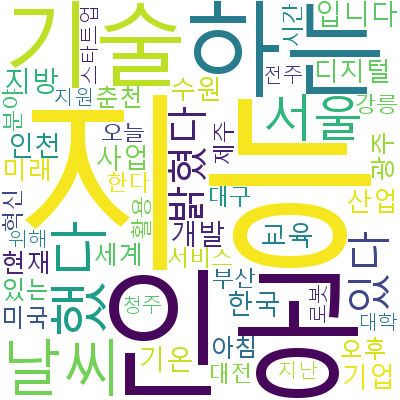

In [ ]:
# WordCloud 라이브러리를 임포트합니다: 텍스트 데이터의 빈도수를 시각화하기 위한 도구입니다.
from wordcloud import WordCloud

# 한글 폰트 경로를 지정합니다. WordCloud에서 한글을 정상적으로 표시하기 위한 준비 단계입니다.
font_path = '/content/malgun.ttf'

# WordCloud 객체를 생성합니다. 여기서는 배경색을 흰색으로, 최대 단어 수를 50개로 설정합니다.
wc = WordCloud(background_color='white', max_words=50, font_path=font_path,width=400, height=400)

# 단어 빈도 사전을 생성합니다. 이는 WordCloud 생성에 사용될 데이터입니다.
count_dic = dict(zip(word_count_tf['단어'], word_count_tf['빈도']))

# WordCloud를 이용해 단어 빈도를 시각화합니다. 이는 가장 많이 사용된 단어를 시각적으로 확인하기 위한 단계입니다.
cloud = wc.fit_words(count_dic)
cloud.to_file('word_cloud.png')
cloud.to_image()

# TF-IDF 및 워드크라우드 시각화

In [ ]:
# TfidfTransformer를 임포트합니다: TF-IDF 값을 계산하기 위한 도구입니다.
from sklearn.feature_extraction.text import TfidfTransformer

# TfidfTransformer 객체를 생성합니다. 이는 문서-단어 행렬의 단어 빈도수를 TF-IDF 값으로 변환하기 위한 준비 단계입니다.
trans = TfidfTransformer()

# 문서-단어 행렬에 대해 TF-IDF 변환을 수행합니다. 이는 각 단어의 중요도를 수치화하는 단계입니다.
dtm2 = trans.fit_transform(tdm)

# 단어와 그 TF-IDF 값을 담은 데이터프레임을 생성합니다. 이는 단어의 중요도 분석을 위한 단계입니다.
df2 = pd.DataFrame({'단어': cv.get_feature_names_out(), 'tf-idf': dtm2.sum(axis=0).flat})

# TF-IDF 값을 기준으로 내림차순으로 정렬합니다. 이는 중요한 단어를 확인하기 위한 단계입니다.
df2 = df2.sort_values('tf-idf', ascending=False)

# 인덱스를 재설정합니다. 이는 데이터의 가독성을 높이기 위한 단계입니다.
df2 = df2.reset_index(drop=True)
df2.index = df2.index + 1

# TF-IDF 값을 'tf_idf.csv' 파일로 저장합니다. 결과를 저장하는 단계입니다. 인코딩을 cp949로 설정하여 한글이 깨지지 않게 합니다.
df2.to_csv('tf_idf.csv', encoding='cp949')

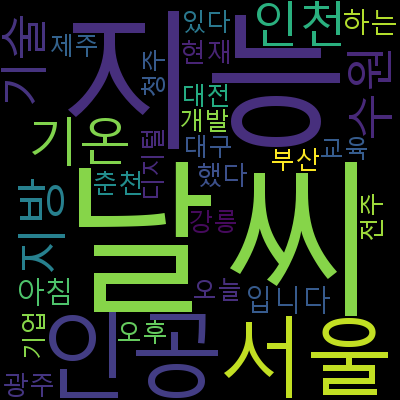

In [ ]:
from wordcloud import WordCloud  # WordCloud 임포트

# 한글 폰트 경로 지정
font_path = '/content/malgun.ttf'

# WordCloud 객체를 다시 생성합니다. 이번에는 TF-IDF 값을 기반으로 가장 중요한 단어를 시각화합니다.
wc = WordCloud(background_color='black', max_words=30, font_path=font_path,width=400, height=400)

# TF-IDF 값을 기반으로 단어 빈도 사전을 생성합니다.
count_dic = dict(zip(df2['단어'], df2['tf-idf']))

# WordCloud를 이용해 TF-IDF 값을 시각화합니다. 이는 중요한 단어를 시각적으로 확인하기 위한 단계입니다.
cloud = wc.fit_words(count_dic)
cloud.to_image()

# 데이터 정제사진반영

In [ ]:
# 필요한 라이브러리를 불러옵니다.
import openpyxl
import pandas as pd
import re

# '정제파일.csv'를 DataFrame 형식으로 불러옵니다.
df = pd.read_excel('정제파일.xlsx')

# 'library.xlsx' 파일을 엽니다.
wb = openpyxl.load_workbook('/content/library.xlsx')
# 활성화된 워크시트를 선택합니다.
ws = wb.active
# '제목_본문' 열의 모든 값을 문자열 타입으로 변환합니다.
df['제목_초록'] = df['제목_초록'].astype(str)
# 정규 표현식 (Regular Expression): 문자열에서 특정 패턴을 찾고, 그 패턴에 맞는 문자열을 다른 문자열로 변경하거나 추출할 수 있는 방법입니다. 복잡한 문자열 처리를 간단하게 할 수 있도록 해줍니다.
#[ ] (대괄호): 대괄호 안에 넣은 모든 문자는 "이 중 어느 하나"를 의미합니다. 예를 들어, [abc]는 'a' 또는 'b' 또는 'c' 중 어느 하나를 찾습니다.
#^ (캐럿), $ (달러), . (점), * (별표), + (플러스), ? (물음표), | (파이프), ( ) (괄호) 등은 특별한 의미를 가지는 메타문자입니다. 이 예제에서는 메타문자 중 점(.)만 사용되어 있으며, 이는 어떤 하나의 문자를 의미합니다.

# 정의: 특수 문자 제거
# 이 줄은 제거하고자 하는 특수 문자를 정의합니다.
# 문자 집합 [ ] 안에 넣은 문자들은 모두 제거 대상입니다.
# 여기서는 대괄호 [ ], 작은따옴표 ' , 쉼표 , 그리고 마침표 . 를 제거 대상으로 설정합니다.
chars_to_remove = r"[\[\]',\.]"
# 데이터 프레임 내용 수정
# '제목_본문' 열의 내용을 수정합니다. replace 함수를 사용해 특정 패턴의 문자를 다른 문자로 바꿉니다.
# 여기서는 chars_to_remove에 정의된 특수 문자들을 빈 문자열 '' (즉, 아무 것도 없는 상태)로 바꿉니다.
# regex=True 파라미터는 replace 함수에게 첫 번째 파라미터(chars_to_remove)가 정규 표현식 패턴임을 알려줍니다. 정규 표현식을 사용하면 복잡한 문자 패턴도 쉽게 지정할 수 있습니다.
df['제목_초록'] = df['제목_초록'].replace(chars_to_remove, '', regex=True)

# 각 행에 공백을 추가하여 단어 경계를 만듭니다. 이는 나중에 정확한 단어 매칭을 위함입니다.
df['제목_초록'] = ' ' + df['제목_초록'].astype(str) + ' '

# 'library.xlsx'의 첫 번째 열에서 '수정전' 단어와 두 번째 열에서 '수정후' 단어를 읽어와서 문자열 대체를 실행합니다.
for j in range(1, ws.max_row + 1):  # 최대 행까지 반복
    a = ws.cell(row=j, column=1).value  # '수정전' 단어
    b = ws.cell(row=j, column=2).value  # '수정후' 단어

    if a is None:  # '수정전' 단어가 없으면 반복을 중지합니다.
        break
    else:
        if b is None:  # '수정후' 단어가 없으면 해당 단어를 공백으로 대체합니다.
            pattern = r'\b' + re.escape(a) + r'\b'  # 단어 경계를 고려하여 정규 표현식 패턴을 만듭니다.
            df['제목_초록'] = df['제목_초록'].str.replace(pattern, " ", regex=True)  # 패턴에 매칭되는 부분을 공백으로 대체합니다.
        else:
            pattern = r'\b' + re.escape(a) + r'\b'  # 단어 경계를 고려하여 정규 표현식 패턴을 만듭니다.
            replacement = f" {b} "  # 대체할 문자열 앞뒤에 공백을 추가합니다.
            df['제목_초록'] = df['제목_초록'].str.replace(pattern, replacement, regex=True)  # 패턴에 매칭되는 부분을 '수정후' 단어로 대체합니다.

    # 모든 데이터를 문자열 타입으로 변환합니다.
    df = df.astype(str)

# 데이터프레임을 CSV 파일로 저장합니다. 인코딩은 cp949를 사용합니다.
df.to_excel('정제파일.xlsx')